In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

In [4]:
x = np.random.normal(0, 1, 100)

In [5]:
noise = np.random.normal(0, 0.5, 100)

In [6]:
y = 2 * x + noise

In [7]:
X_matrix = sm.add_constant(x)

In [8]:
model = sm.OLS(y, X_matrix)
results = model.fit()

In [15]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1347.
Date:                Sat, 17 Jan 2026   Prob (F-statistic):           4.54e-59
Time:                        12:47:42   Log-Likelihood:                -66.393
No. Observations:                 100   AIC:                             136.8
Df Residuals:                      98   BIC:                             142.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.048      0.078      0.9

In [14]:
residuals = results.resid

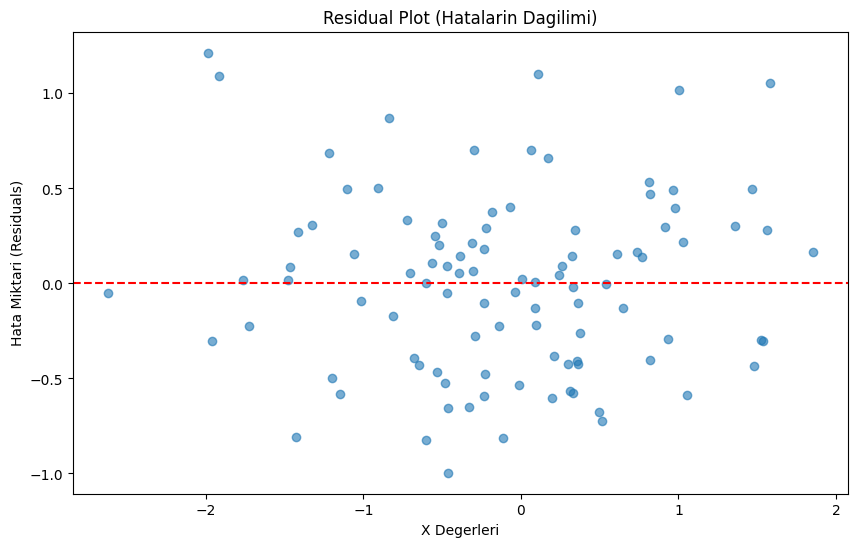

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--',)
plt.title('Residual Plot (Hatalarin Dagilimi)')
plt.xlabel('X Degerleri')
plt.ylabel('Hata Miktari (Residuals)')
plt.show()

Residual plot incelendiginde herhangi bir oruntuye (pattern) veya degisken varyansa (heteroscedasticity) rastlanmamistir. Hatalar 0 etrafinda rastgele dagilmistir. Bu durum, Lineer Regresyon varsayimlarinin saglandigini gosterir.

---

"Not: Aşağıdaki analiz raporu, kod çıktılarına dayalı olarak oluşturulmuş örnek bir yorum şablonudur."

# 📊 OLS Regresyon Analiz Raporu

### 1. Model Performansı
* **Açıklayıcılık ($R^2$):** Modelin $R^2$ değeri **0.932** olarak hesaplanmıştır. Bu, bağımsız değişkenimiz olan $x$'in, bağımlı değişken $y$'deki değişimin **%93.2'sini** başarıyla açıkladığını gösterir.

### 2. Katsayı Tahminleri (Coefficients)
* **Eğim ($\beta_1$):** Gerçek katsayımız **2.0** idi. Modelimiz bunu **1.9284** olarak tahmin etti.
* **Güven Aralığı:** Gerçek değer (2.0), modelin %95 güven aralığı olan `[1.824 - 2.033]` aralığının içine düşmektedir. Bu, tahminin başarısını kanıtlar.
* **Sabit Terim (Constant):** Veriyi üretirken sabit terim eklememiştik. Model de sabit terimin anlamsız olduğunu ($p > 0.05$) doğru bir şekilde tespit etmiştir.

### 3. Hipotez Testi
* $H_0: \beta_1 = 0$ (X'in Y üzerinde etkisi yoktur)
* $H_1: \beta_1 \neq 0$ (X'in Y üzerinde etkisi vardır)
* **Sonuç:** $p < 0.05$ (hatta $0.000$) olduğu için $H_0$ **reddedilmiştir**. İlişki istatistiksel olarak anlamlıdır.

### 4. Varsayım Kontrolü (Residual Analysis)
* **Homoscedasticity:** Hata terimlerinin (residuals) grafiği incelendiğinde, noktaların 0 etrafında rastgele dağıldığı görülmüştür. Herhangi bir huni veya U şekli (pattern) yoktur.
* **Sonuç:** Lineer regresyonun varyans homojenliği varsayımı sağlanmaktadır.

---